In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_row', 1000)

### Dictionaries to treat vague values

In [2]:
# Dictionary for City To State
dis2state= {"Bangalore":"Karnataka","Chennai":"Tamil Nadu","Pondicherry":"Puducherry","Kerala":"Kerala","Belagavi":"Karnataka","Yadhgirir":"Karnataka","Hyderabad":"Andhra Pradesh","Ahmedabad":"Gujarat","Madurai":"Tamil Nadu","Trichy":"Tamil Nadu","Coimbatore":"Tamil Nadu","your city":"Others","Kadapa":"Andhra Pradesh","Siliguri":"West Bengal","Gadwal":"Telangana","Tamilnadu":"Tamil Nadu","Nellore":"Andhra Pradesh","Warangal":"Telangana","Anantapur":"Andhra Pradesh","Chennai/Bangalore":"Tamil Nadu","Uttarakhand":"Uttarakhand","Nagaon":"Assam","Mangalore":"Karnataka"}
# Dictionary for Source
dictSource = {"Referrals":"Referrals","Delhi-NCR":"Referrals","API":"API","WhatsApp OptIn Form":"WhatsApp","Facebook":"Facebook","unknown":"Others","Airavatha data":"Referrals","Reused Leads":"Referrals","Web Chat Referrals":"Referrals","Sandeep":"Referrals","Ubereats Existing list":"Referrals","CorpW":"Referrals","lynk-mas-qkr-oct3":"API","blr-nrby-aug-2":"API","Delivery_lynk_che_tam_08 Nov 19":"API","micl-mas-qkr-oct3":"API","Quikr":"Referrals","blr-nrby-b2-aug-12-rep1":"API","Vikram":"Referrals","fb-remarketing-mumbai-july18":"Facebook","Quikr_Zomato_Chennai":"Referrals","blr-nrby-aug-2-rep1":"API","micl-mas-qkr-oct11":"API","Quikr_Zomato_Bangalore":"Referrals","smsBlast-mig2wa":"WhatsApp","Web Chat":"Facebook","delhi-lal-july-29-1mil-b2-rep":"API","fb-lookalike-mumbai-july25":"Facebook","blr-nrby-b3-aug-13-rep1":"API","fb-lookalike-andhra-july25":"Facebook","blr-nrby-b2-aug-12":"API","atuber-blrvic1mil-kan-19-sep-rep1":"API","fb-ad-mumbai":"Facebook","Quikr_Zomato_Hyderabad":"Referrals","fb-lookalike-chennai-sept13":"Facebook","fb-uber-sep-2019-excl":"Facebook","delhi-lal-july-29-1mil-b2":"API","Quikr_Document":"Referrals","Quikr_Mumbai":"Referrals","atuber-blrvic1milb2-kan-20-sep":"API","delhi-lal-july-31-1mil-b4-rep":"API","Quikr_Zomato_Patna":"Referrals","atuber-blrvic1milb2-kan-20-sep-rep1":"API","lalamoveHyderabad":"Referrals","blr-nrby-b3-aug-13":"API","delhi-lal-july-26-1mil":"API","Bangalore_Reuse_Leads":"Referrals","Quikr_Delivery_Chennai":"Referrals","delhi-lal-july-30-1mil-b3":"API","fb-remarketing-andhra-july18":"Facebook","Quikr_Zomato_DelhiHyd":"Referrals","atuber-blrvic1mil-kan-19-sep":"API","fb-acq-zom-sms-july-23":"Facebook","ddun-nrby-aug-2":"Referrals","delhi-lal-july-31-1mil-b4":"API","atuber-blrvic1mil-kan-19-sep-rep2":"API","delhi-lal-july-30-1mil-b3-rep":"API","fb-gati-sep-2019-ed-unempl":"Facebook","Webform":"Facebook","delhi-lal-july-26-1mil-rep":"API","Unified Interface":"Facebook","Referrals-webform":"Referrals","fb-lookalike-maharashtra-july25":"Facebook","lalamoveBangalore":"Referrals","fb-lookalike-bangalore-sept18":"API","fb-lookalike-bangalore-sept27":"API","Quikr_Document_Bangalore":"Referrals","fb-remarketing-karnataka-july18":"Facebook","smsBlast-Reused leads":"Referrals","Ecom Express":"Referrals","atuber-kan-17-oct-rep":"API","Uber BGC not cleared data":"Referrals","fb-remarketing-maharashtra-july18":"Facebook","Partnership - Nudge":"Referrals","majestic-july-6":"API","fb-lookalike-hyderabad-sept13":"Facebook","fb-localtraits-bangalore-sept27":"Facebook","ublr-06-sep-3lac":"API","Resume":"Referrals","delhi-lal-july-19":"API","delhi-18-30yo-lt10k-remit-rep1":"API","Punjab":"Referrals","atuber-kan-18-oct-rep":"API","power_referrers_9 Nov 19":"API","fb-remarketing-chennai-july18":"Facebook","ublr-09-sep-3lac":"API","delhi-18-33yo-10-15k-hdat-july-17":"API","fb-uber-sep-2019-ed-unempl":"Facebook","Uttar Pradesh":"Referrals","Quikr_Zomato":"Referrals","fb-lookalike-chennai-july25":"Facebook","delhi-18-30yo-lt10k":"API","atl-reeng-sms":"WhatsApp","Ola/Uber/Move in synk":"Referrals","Quikr SMS":"WhatsApp","fb-lookalike-ncr-july25":"Facebook","Andhra Pradesh":"Referrals","power_referrers":"Referrals","fb-localtraits-bangalore-sept18":"Facebook","fb-remarketing-ncr-july18":"Facebook","ubblr-qkr-sep25-klish":"API","Tamil Nadu":"Referrals","central-delhi-30-45yo-gt10k":"API","Karnataka":"Referrals","patna-18-30yo-gt10k-rep1-july-19":"API","PWA":"Referrals"}
# Dictionary for Status
dictStatus = {"CNP/Switched Off/Not Reachable":"RNR","Wrong Number/Number Not Valid":"Not-Interested","Very Interested":"Interested","RNR":"RNR","Not Interested - Disconnected the Call":"Not-Interested","Not Interested - Got Other Jobs":"Not-Interested","Not Interested - Not Applied":"Not-Interested","Not Interested":"Not-Interested","Interested":"Interested","Not Applied":"RNR","Not Interested - Wrong Number":"Not-Interested","Don't Meet Requirements":"RNR","Other Reasons":"RNR","Switched Off/Not Reachable":"RNR","Disconnected the Call":"RNR","Switched Off/Not Reachable/No Incoming":"RNR","Not Interested - Location Issue":"Not-Interested","Want Non-Delivery Jobs":"RNR","Not Interested - Applied by Mistake":"Not-Interested","Not Interested - Not Sure":"Not-Interested","Not Interested - Others":"Not-Interested","Not Sure":"RNR","Joined":"Not-Interested","Got Other Jobs":"Not-Interested","Location Issue":"RNR","Language Barrier":"RNR","Not Interested - Want Non-Delivery Jobs":"Not-Interested","Applied for Someone Else":"RNR","Applied by Mistake":"Not-Interested","Not sure":"RNR","Not Interested - Want Jobs in Other Category":"Not-Interested","Number Not Valid/Number Does Not Exist":"Not-Interested","Call Back":"RNR","Not Interested - Want Jobs in Other Company (but same category)":"Not-Interested","Not Interested - Call Back":"Not-Interested","Want Other Delivery Jobs":"RNR","Disconnected the call":"RNR","Not Interested - Want Other Delivery Jobs":"Not-Interested","Not Interested but Referred Someone":"Not-Interested","Interested but CNP on Follow-up":"Interested","Interested and Referred Someone":"Interested","Interested but in village":"Interested","Interested but RNR on Follow-up":"Interested","Not interested":"Not-Interested","Applied by mistake":"Not-Interested","Location issue":"RNR","CNP/Switched off/Not Reachable":"RNR","Switched Off/Not Reachable/No Incoming Up":"RNR"}

### Reading Files

In [3]:
leads = pd.read_csv("~/Downloads/leads.csv",index_col=False, encoding='Latin-1')
lead_calls = pd.read_csv("~/Downloads/lead_calls.csv",index_col=False)
telecallers = pd.read_csv("~/Downloads/telecallers.csv",index_col=False)

In [38]:
lead_calls.shape

(12335, 5)

# Data Cleaning

## 1. leads table

### Dropping columns id, userId, name, phoneNumber 

#### As userId is used for some internal table. Name and phone number have redundant values and are of no use
#### Removing createdAt date column as we will use receivedAt date 

In [4]:
leads = leads.drop(['userId','name','phoneNumber','createdAt'], axis=1)

In [5]:
print(leads.isnull().sum())
print("No. of rows where Both Values are missing",sum(leads.apply(lambda x: sum(x.isnull().values), axis = 1)>1))

id               0
city           738
state         1380
source           2
isExternal       0
receivedAt       0
dtype: int64
No. of rows where Both Values are missing 718


#### 7.4% city and 14% state values are missing. 7.24% where both values are missing

In [6]:
# Using the dictionary to map city to state
for i in leads.index:
    if leads["city"][i] in dis2state.keys() and pd.isnull(leads['state'][i]):
        leads['state'][i] = dis2state.get(leads["city"][i])

/home/anurag/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


#### Many states are worngly indicated in the leads table. Hence correcting.

In [7]:
leads.loc[leads['state'] == 'Delhi'] = 'Delhi-NCR'
leads.loc[leads['state'] == 'UP'] = 'Uttar Pradesh'
leads.loc[leads['state'] == 'Tamilnadu'] = 'Tamil Nadu'
leads.loc[leads['state'] == 'Bangalore'] = 'Karnataka'
leads.loc[leads['state'] == '#REF!'] = 'Andhra Pradesh'
leads.loc[leads['state'] == 'Chandigarh'] = 'Punjab'

#### Source: Due to a lot of vague values in sources, It will be good to categorize it in labels as : Referrals | API | WhatsApp | Facebook | Others

In [8]:
leads["source"] = leads.source.map(dictSource) 

#### isExternal: There are other state values (other than True or False). We can consider them as True as these are also from external sources

In [9]:
leads["isExternal"]=leads["isExternal"].apply(lambda x: True if x!=False else False)

## 2. lead_calls table

In [10]:
# Dropping createdAt and comments
lead_calls = lead_calls.drop(['comments','createdAt'], axis=1)

#### Converting vague status to 3 categories: Interested | Not-Interested | RNR

In [11]:
lead_calls["status"] = lead_calls.status.map(dictStatus) 

#### Client has 'Uber Eats' and 'Uber eats'. Merging them to one.

In [12]:
lead_calls.loc[lead_calls['client'] == "Uber eats", 'client'] = "Uber Eats"

Zomato          5236
Swiggy          2235
Uber Eats        952
Move in sync     400
1 MG             337
Rapido           330
Amazon Flex      277
Random           277
Dunzo            256
Lynk             232
Micelio          194
Uber             155
Lalamove         154
Gati             129
KFC              101
BharatPe          93
Micelio (N)       52
Big Basket        36
Grab              27
Lynk (N)          16
Gati (L)           2
Name: client, dtype: int64

## 3. telecallers table

In [13]:
# Dropping unnecessary columns
telecallers = telecallers.drop(['phoneNumber',"createdAt"], axis = 1)

# Merging Dataframes

#### Checking If any telecaller in the lead_calls table is missing in the telecallers table

In [14]:
lead_calls['telecallerId'].isin(telecallers['id']).value_counts()

True    12335
Name: telecallerId, dtype: int64

#### Replacing telecallerId in lead_calls table with their respective names

In [15]:
lead_calls = lead_calls.merge(telecallers, left_on='telecallerId', right_on='id')
lead_calls = lead_calls.drop(['id_y','id_x',"telecallerId"], axis = 1)

#### Checking if all the leads have been called 

In [16]:
# 87.84% leads have been called.
leads['id'].isin(lead_calls['leadId']).value_counts()

True     8710
False    1206
Name: id, dtype: int64

#### Merging lead and lead_calls table

In [17]:
data = lead_calls.merge(leads, left_on='leadId', right_on='id')
data = data.drop(['leadId'], axis = 1)
print(data.shape)
data.head()

(11003, 10)


,client,status,calledAt,name,id,city,state,source,isExternal,receivedAt
0,Amazon Flex,Not-Interested,2019-07-25T17:00:00Z,Sheeba,724467a5-52d1-4989-a870-99ae65d3e0e8,Bangalore,Karnataka,Referrals,False,2019-02-24T00:00:00Z
1,Lalamove,Not-Interested,2019-08-30T14:00:00Z,Sheeba,fea7fb85-3355-4747-98fd-dae1b9aca52a,Hyderabad,Telangana,Facebook,False,2019-08-21T00:00:00Z
2,Lalamove,RNR,2019-08-27T15:00:00Z,Sheeba,fea7fb85-3355-4747-98fd-dae1b9aca52a,Hyderabad,Telangana,Facebook,False,2019-08-21T00:00:00Z
3,Lalamove,RNR,2019-08-21T17:00:00Z,Sheeba,fea7fb85-3355-4747-98fd-dae1b9aca52a,Hyderabad,Telangana,Facebook,False,2019-08-21T00:00:00Z
4,Zomato,Not-Interested,2020-06-01T10:30:00Z,Sheeba,3308d114-a9ed-4d81-8d08-50b28171790f,Hyderabad,Telangana,Referrals,False,2019-05-29T00:00:00Z


# Univariate Analysis

### 1.  telecallers

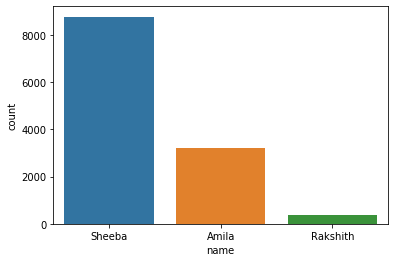

In [18]:
# Out of total 5 telecallers, only 3 are involved in leads calling
sns.countplot('name',data=lead_calls)
plt.show()

### 2. States

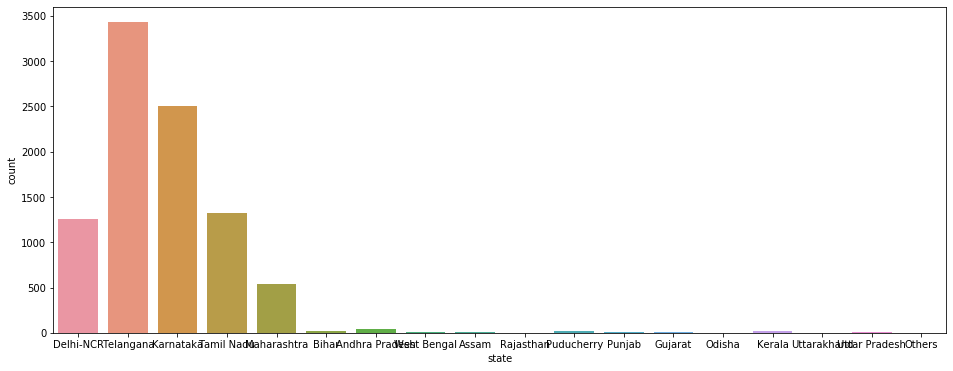

In [19]:
# The graph clearly shows high leads from Southern India and very few leads from Norhthern India (except Delhi-NCR)
plt.figure(figsize=(16, 6))
sns.countplot('state',data=leads)
plt.show()

### 3. Sources

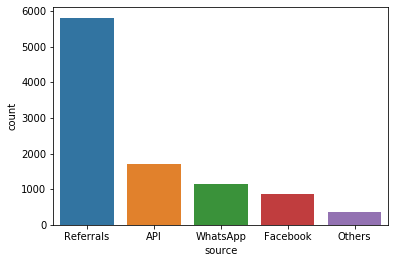

In [20]:
# Maximum leads are referrals and very few leads from whatsapp or facebook which could be improved
sns.countplot('source',data=leads)
plt.show()

### 4. isExternal

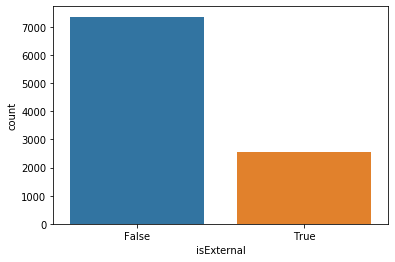

In [21]:
# ~75% acquired by Job Assistant and ~25% are from external
sns.countplot('isExternal',data=leads)
plt.show()

### 5. Status

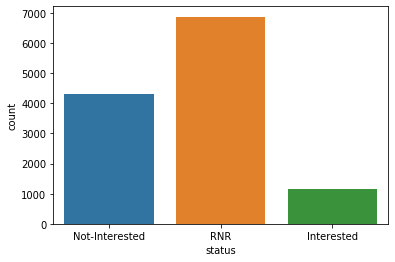

In [22]:
sns.countplot('status',data=lead_calls)
plt.show()

### 6. Client

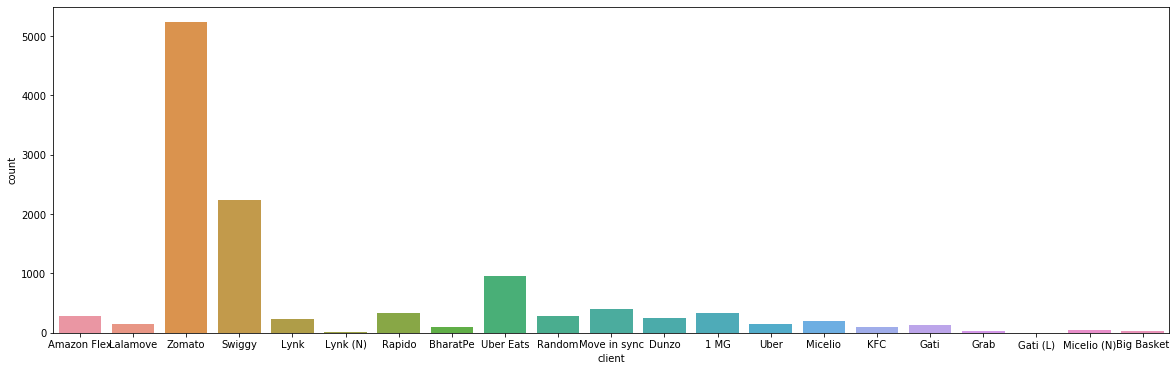

In [23]:
# Major Emlpoyer are the food delivery services which shows that majorly, Delievery Services are getting targeted
plt.figure(figsize=(20, 6))
sns.countplot('client',data=lead_calls)
plt.show()

### 7. Gap (Gap between Lead Recieved and Lead called)

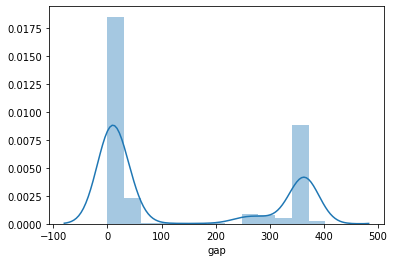

In [24]:
# The two spikes shows that there is around 1 year gap but this must be definitely data error. As some receivedAt
# are of 2020 which are wrong
data[["calledAt", "receivedAt"]] = data[["calledAt", "receivedAt"]].apply(pd.to_datetime)
data['gap'] = abs((data['calledAt'] - data['receivedAt']).dt.days)
sns.distplot(data['gap']);
# There are values like 2020-05-01 10:30:00+00:00 | 2020-04-01 10:30:00+00:00 | 2020-06-01 10:30:00+00:00 
# (Values of months & dates got interchanged)

In [25]:
# Interchanging month and dates
data['calledAt'] = data['calledAt'].astype(str)
data.loc[data['calledAt'] == "2020-06-01 10:30:00+00:00", 'calledAt'] = "2020-01-06 10:30:00+00:00"
data.loc[data['calledAt'] == "2020-05-01 10:30:00+00:00", 'calledAt'] = "2020-01-05 10:30:00+00:00"
data.loc[data['calledAt'] == "2020-04-01 10:30:00+00:00", 'calledAt'] = "2020-01-04 10:30:00+00:00"
# Wrong year : Converting 2020 to 2019
data.loc[data['calledAt'] == "2020-08-30 10:30:00+00:00", 'calledAt'] = "2019-08-30 10:30:00+00:00"
data.loc[data['calledAt'] == "2020-08-30 11:30:00+00:00", 'calledAt'] = "2019-08-30 11:30:00+00:00"

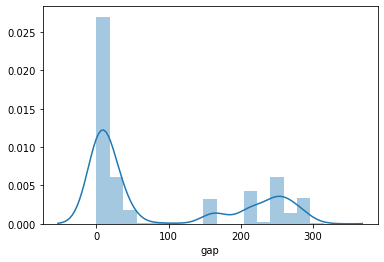

In [26]:
# Some values more than 200 shows that there are some callings which is made after a gap of 200 days. This should be reduced
data['gap'] = data['gap'].apply(lambda x : abs(x-365) if x>200 else x)
data["calledAt"] = data["calledAt"].apply(pd.to_datetime)
data['gap'] = abs((data['calledAt'] - data['receivedAt']).dt.days)
sns.distplot(data['gap']);

# Bivariate Analysis

### 1. state and isExternal(Job Assisstant Efficiency per State)

In [27]:
# Gathering leads through job assistant in the states(at starting of the x-axis of the plot but 
# have very low towers) like Karnataka, Delhi-NCR, Andhra Pradesh should be improved
state_leads = leads[['state', 'isExternal','id']].groupby(['state','isExternal']).count().reset_index()
state_leads = state_leads.pivot(index='state', columns='isExternal', values='id').reset_index()
state_leads.columns=['state', 'Job_Assistant', 'External']
state_leads = state_leads.fillna(0)
state_leads['Job_Assistant_Efficiency'] = state_leads['Job_Assistant']*100/(state_leads['Job_Assistant']+state_leads['External'])
state_leads.head()

,state,Job_Assistant,External,Job_Assistant_Efficiency
0,Andhra Pradesh,27.0,14.0,65.853659
1,Assam,7.0,0.0,100.000000
2,Bihar,23.0,0.0,100.000000
3,Delhi-NCR,52.0,1200.0,4.153355
4,Gujarat,4.0,6.0,40.000000


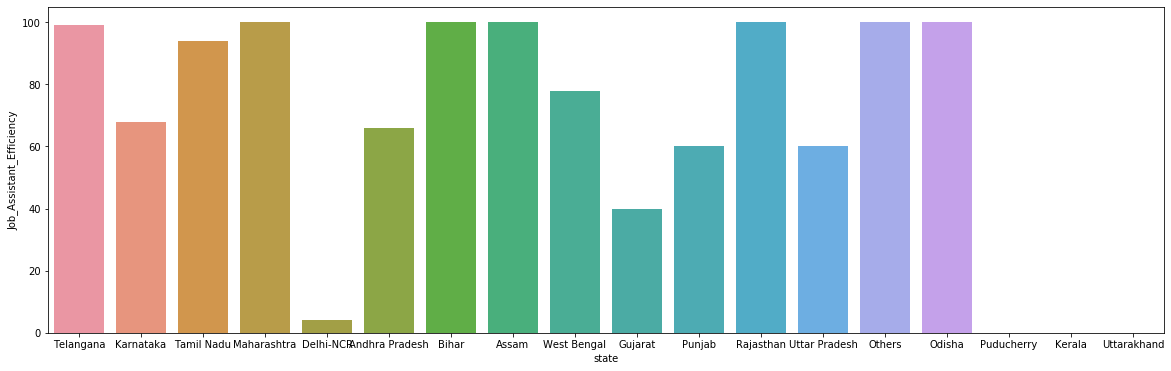

In [28]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x="state", y="Job_Assistant_Efficiency", data=state_leads.sort_values("Job_Assistant", ascending=False))

### 2. Epoch and isExternal

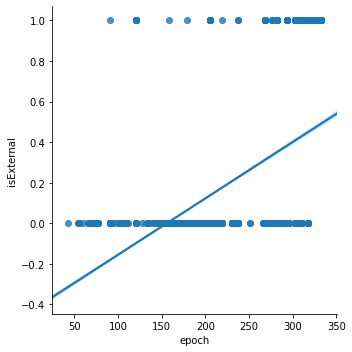

In [29]:
# Graph shows that with time the there is a increase in leads from 3rd party source
data['isExternal'] = data['isExternal']*1
data['epoch'] = data['receivedAt'].dt.dayofyear
data.head()
sns.lmplot(y='isExternal', x='epoch', data=data)

### 3. Status and state(Conversion Efficiency per state)

In [30]:
# Gathering leads through job assistant in the states(at starting of the x-axis of the plot but 
# have very low towers) like Karnataka, Delhi-NCR, Andhra Pradesh should be improved
status_state = data[['state', 'status','id']].groupby(['state','status']).count().reset_index()
status_state = status_state.pivot(index='state', columns='status', values='id').reset_index()
status_state = status_state.fillna(0)
status_state['Net_calls'] = status_state['Interested']+status_state['Not-Interested']+status_state['RNR']
status_state['Converting_Efficiency'] = status_state['Interested']*100/status_state['Net_calls']
status_state.head()

status,state,Interested,Not-Interested,RNR,Net_calls,Converting_Efficiency
0,Andhra Pradesh,2.0,26.0,36.0,64.0,3.125000
1,Assam,0.0,4.0,7.0,11.0,0.000000
2,Bihar,12.0,11.0,12.0,35.0,34.285714
3,Delhi-NCR,14.0,18.0,30.0,62.0,22.580645
4,Gujarat,3.0,4.0,5.0,12.0,25.000000


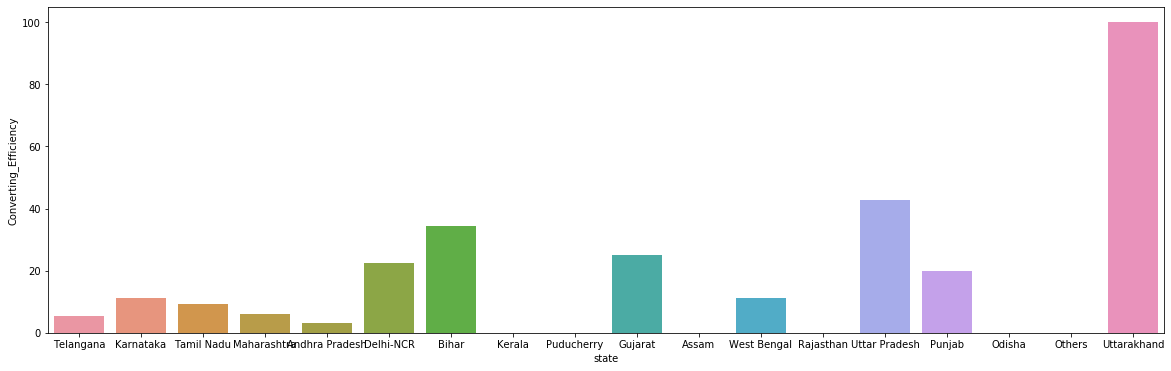

In [32]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x="state", y="Converting_Efficiency", data=status_state.sort_values("Net_calls", ascending=False))

### 4. Client & Status(Conversion Efficiency per Client)

In [33]:
client_status = data[['client', 'status','id']].groupby(['client','status']).count().reset_index()
client_status = client_status.pivot(index='client', columns='status', values='id').reset_index()
client_status = client_status.fillna(0)
client_status['Net_calls'] = client_status['Interested']+client_status['Not-Interested']+client_status['RNR']
client_status['Converting_Efficiency'] = client_status['Interested']*100/client_status['Net_calls']
client_status.head()

status,client,Interested,Not-Interested,RNR,Net_calls,Converting_Efficiency
0,1 MG,26.0,89.0,222.0,337.0,7.715134
1,Amazon Flex,38.0,97.0,142.0,277.0,13.718412
2,BharatPe,0.0,4.0,8.0,12.0,0.000000
3,Big Basket,7.0,8.0,21.0,36.0,19.444444
4,Dunzo,31.0,99.0,124.0,254.0,12.204724


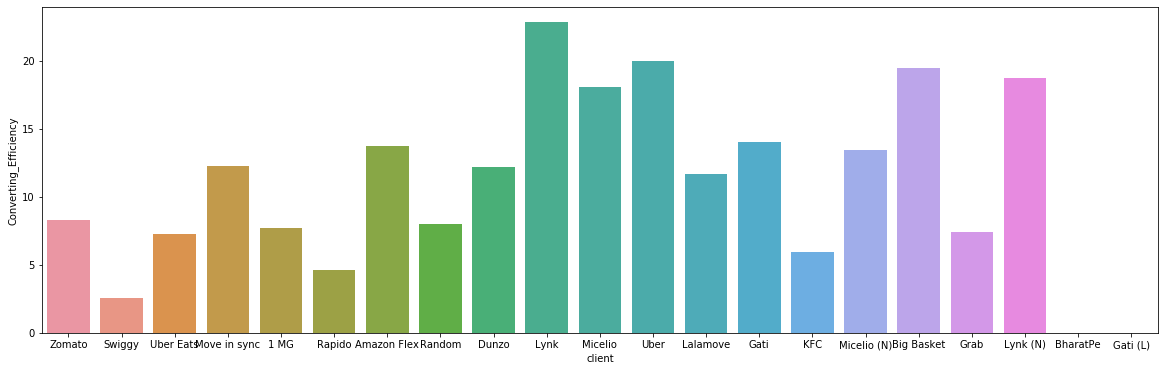

In [34]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x="client", y="Converting_Efficiency", data=client_status.sort_values("Net_calls", ascending=False))